<a href="https://colab.research.google.com/github/gsb3501/2023bigdatamarketing/blob/main/20230821.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
!sudo apt-get install - y fonts-nanum
!sudo fc-cache -fv
!rm -/ .cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package y
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ashopping2.csv", encoding = 'cp949')
df

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,...,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,...,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,...,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,...,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,...,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,...,5,4,4,4,4,4,5,5,4,4


## 일표본 t-test

In [ ]:
import pandas as pd
from scipy import stats

print('총매출액 평균:', df.총_매출액.mean())
print(stats.ttest_1samp(df['총_매출액'], 7700000))

총매출액 평균: 7068689.76
TtestResult(statistic=-2.8657430145836003, pvalue=0.0042475861483265475, df=999)


In [ ]:
print('총매출액 평균 : ', df.총_매출액.mean())

총매출액 평균 :  7068689.76


In [ ]:
from scipy import stats
stats.ttest_1samp(df['총_매출액'], 7700000)

TtestResult(statistic=-2.8657430145836003, pvalue=0.0042475861483265475, df=999)

##독립표본 t-검정

클레임 접수 여부에 따른 방문빈도의 평균 차이

In [ ]:
# 모듈 및 데이터 탑재
import pandas as pd
from scipy import stats
import numpy as np

# 등분산 검정
no_claim = df[df.클레임접수여부 ==0]
df2 = np.array(no_claim.방문빈도)
claim = df[df.클레임접수여부 ==1]
df3 = np.array(claim.방문빈도)
stats.bartlett(df2, df3)

BartlettResult(statistic=13.626177910965525, pvalue=0.00022305349806448475)

In [ ]:
no_claim = df[df['클레임접수여부']==0]
claim = df[df.클레임접수여부 ==1]

In [ ]:
no_claim

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,...,7,7,6,6,6,5,3,6,6,6
4,5,0,13745950,73,188301,9,246350,1,2,0,...,5,6,6,6,5,5,6,6,5,6
5,6,0,3323610,26,127831,20,348145,1,4,0,...,6,6,6,6,5,5,5,6,6,5
6,7,0,2369340,6,394890,30,380945,1,1,0,...,4,5,6,4,6,5,4,5,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,0,12390390,20,619520,23,380395,1,3,0,...,7,7,6,5,6,7,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,...,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,...,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,...,5,4,4,4,4,4,5,5,4,4


In [ ]:
claim

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,5,6,6,6,6,6,5,6
7,8,0,12717240,109,116672,4,354735,1,2,1,...,6,6,5,7,6,6,5,6,6,6
13,14,0,4098600,15,273240,14,334100,2,4,1,...,6,7,6,6,6,4,5,7,6,6
14,15,0,3754700,21,178795,23,380200,2,4,1,...,6,5,6,6,7,4,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,986,0,5358350,16,334897,26,364650,1,4,1,...,6,6,5,6,5,5,6,6,6,6
986,987,0,7879000,35,225114,14,333850,1,2,1,...,7,6,7,6,6,4,5,6,6,6
989,990,0,2540870,15,169391,23,379950,2,4,1,...,6,5,5,6,5,6,6,5,5,5
991,992,0,9302490,40,232562,10,304450,1,2,1,...,6,6,6,6,6,6,6,6,6,6


In [ ]:
#등분산 검정
from scipy import stats
import numpy as np

#stats 함수는 배열형태의 변수를 넣어줘야함
no_claim = np.array(no_claim['방문빈도'])
claim = np.array(claim['방문빈도'])
stats.bartlett(no_claim, claim)

# 등분산 검정의 귀무, 대립가설
# 귀무 : 분산이 같다
# 연구 : 분산이 다르다

BartlettResult(statistic=13.626177910965525, pvalue=0.00022305349806448475)

In [ ]:
# 독립표본 t-검정 및 방문빈도 평균
print(stats.ttest_ind(df2, df3, equal_var = False)) #equal_var = False 면 등분산이 아닐 때 ttest 한다는 뜻
print('클레임 접수여부(0) 고객 평균방문빈도 : ', np.mean(no_claim))
print('클레임 접수여부(1) 고객 평균방문빈도 : ', np.mean(claim))


Ttest_indResult(statistic=2.595726838875684, pvalue=0.009577734932789503)
클레임 접수여부(0) 고객 평균방문빈도 :  28.184842883548985
클레임 접수여부(1) 고객 평균방문빈도 :  24.736383442265794


## 대응표본 t 검정
멤버십 프로그램 전 만족도와 도입 후 만족도의 차이

귀무 = A쇼핑 고객들의 멤버십프로그램 도입 전 만족도와 도입 후 만족도의 차이는 없다

연구 = A쇼핑 고객들의 멤버십프로그램 도입 전 만족도와 도입 후 만족도의 차이는 있다

In [ ]:
stats.ttest_rel(df['멤버쉽_프로그램_가입전_만족도'], df['멤버쉽_프로그램_가입후_만족도'])

TtestResult(statistic=-29.560410783358122, pvalue=1.7319140513197275e-138, df=999)

In [ ]:
df['멤버쉽_프로그램_가입전_만족도'].mean()

4.296

In [ ]:
df['멤버쉽_프로그램_가입후_만족도'].mean()

5.524

## 분산분석

###일원분산분석

구매유형에 따른 총매출액의 차이

귀무 = A쇼핑 고객의 구매유형에 따른 총매출액의 차이는 없다

연구 = A쇼핑 고객은 적어도 1개의 구매유형이 다른 구매유형과 총 매출액 차이가 있다

In [ ]:
#모듈 및 데이터 탑재
!pip install pingouin #분산분석용
!pip install scikit-posthocs #사후분석용

In [ ]:
# 등분산 검정
df1 = df[['구매유형','총_매출액']]
df1

,구매유형,총_매출액
0,4,4007080
1,4,3168400
2,4,2680780
3,4,5946600
4,2,13745950
...,...,...
995,3,5135090
996,2,10315690
997,4,2741290
998,3,11268990


In [ ]:
df1['구매유형'].unique()

array([4, 2, 1, 3])

In [ ]:
구매유형 = []
for i in range(1, 5) :
  구매유형.append(df1[df1['구매유형']==i])

구매유형

[     구매유형    총_매출액
 6       1  2369340
 50      1  3225460
 69      1  3312450
 106     1  2442690
 179     1  3318470
 188     1  3554850
 189     1  2407150
 248     1  3382000
 251     1  3903900
 253     1  3019450
 272     1  4897520
 307     1  2605360
 314     1  2572920
 347     1  3382700
 377     1  2651810
 382     1  2527500
 389     1  2557670
 424     1  4228700
 427     1  3623650
 474     1  3864880
 478     1  2501250
 492     1  2508000
 501     1  3171450
 515     1  5688620
 546     1  2881390
 656     1  2817340
 667     1  2740000
 675     1  3694150
 677     1  3147000
 678     1  3895720
 761     1  6060750
 764     1  4230500
 773     1  3281350
 803     1  3778660
 813     1  2677350
 867     1  3573390
 895     1  4002730
 920     1  2725950
 926     1  2754200
 929     1  3533000
 935     1  4375500
 963     1  4590710
 968     1  3880860,
      구매유형     총_매출액
 4       2  13745950
 7       2  12717240
 10      2   7080050
 11      2   5987220
 15      2   9

In [ ]:
stats.levene(구매유형[0]['총_매출액'], 구매유형[1]['총_매출액'],구매유형[2]['총_매출액'], 구매유형[3]['총_매출액']) #등분산 검정

LeveneResult(statistic=61.83834278363635, pvalue=1.1483869977419955e-36)

In [ ]:
pd.options.display.float_format = '{:.3f}'.format
df1.groupby('구매유형').mean()

,총_매출액
구매유형,
1,3403682.326
2,9612645.079
3,11779839.653
4,4392794.395


In [ ]:
# Welch 일원분산분석
# 등분산성 X
import pingouin as pg
pg.welch_anova(dv ='총_매출액', between = '구매유형', data = df1)
#dv = 비교하고자 하는 수치값
#between = 어떤 그룹 사이를 비교할 건지

#p-unc : p-value

,Source,ddof1,ddof2,F,p-unc,np2
0,구매유형,3,230.936,88.238,0.000,0.193


In [ ]:
# 사후분석
import scikit_posthocs
scikit_posthocs.posthoc_scheffe(df1, val_col = '총_매출액', group_col = '구매유형', sort =True)
#1에 가까울수록 차이가 없고, 0에 가까울수록 차이가 있음

,1,2,3,4
1,1.000,0.000,0.000,0.805
2,0.000,1.000,0.008,0.000
3,0.000,0.008,1.000,0.000
4,0.805,0.000,0.000,1.000


In [ ]:
# 등분산성 O -> stats.models library 안의 ols함수 사용

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('총_매출액 ~ 구매유형', data = df1).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
구매유형,1.000,3386995098917810.500,3386995098917810.500,74.958,0.000
Residual,998.000,45094574393149120.000,45184944281712.547,NaN,NaN


## 이원분산분석

In [ ]:
df1 = df[['총_매출액', '구매유형', '거주지역']]
df1

,총_매출액,구매유형,거주지역
0,4007080,4,6
1,3168400,4,4
2,2680780,4,6
3,5946600,4,5
4,13745950,2,6
...,...,...,...
995,5135090,3,6
996,10315690,2,6
997,2741290,4,4
998,11268990,3,5


In [ ]:
# 분산분석 종류1 : pg.anova
pg.anova(dv='총_매출액', between = ['구매유형', '거주지역'], data = df1)

,Source,SS,DF,MS,F,p-unc,np2
0,구매유형,6347752626180900.000,3.000,2115917542060300.000,64.342,0.000,0.165
1,거주지역,16140404571324428.000,6.000,2690067428554071.500,81.801,0.000,0.335
2,구매유형 * 거주지역,3867936213048915.000,18.000,214885345169384.156,6.534,0.000,0.108
3,Residual,32096439113329668.000,976.000,32885695812837.773,NaN,NaN,NaN


In [ ]:
# 분산분석 종류2 : ols()
model = ols('총_매출액 ~ C(구매유형) * C(거주지역)', data = df1).fit() #구매유형, 거주지역 서로간의 연관성도 함께 보고자 하는 경우 + 대신 *
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(구매유형),3.000,9376756399592746.000,3125585466530915.500,95.044,0.000
C(거주지역),6.000,4031991176645000.000,671998529440833.375,20.434,0.000
C(구매유형):C(거주지역),18.000,2988570754726374.000,166031708595909.656,5.049,0.000
Residual,976.000,32096439113329672.000,32885695812837.777,NaN,NaN


In [ ]:
# 사후 검증
scikit_posthocs.posthoc_scheffe(df1, val_col = '총_매출액', group_col='구매유형', sort = True)

,1,2,3,4
1,1.000,0.000,0.000,0.805
2,0.000,1.000,0.008,0.000
3,0.000,0.008,1.000,0.000
4,0.805,0.000,0.000,1.000


In [ ]:
# 사후 검증
scikit_posthocs.posthoc_scheffe(df1, val_col = '총_매출액', group_col='거주지역', sort = True)

,1,2,3,4,5,6,7
1,1.000,1.000,1.000,1.000,1.000,0.988,0.412
2,1.000,1.000,1.000,0.980,0.965,0.339,0.000
3,1.000,1.000,1.000,0.978,0.935,0.019,0.000
4,1.000,0.980,0.978,1.000,1.000,0.008,0.000
5,1.000,0.965,0.935,1.000,1.000,0.002,0.000
6,0.988,0.339,0.019,0.008,0.002,1.000,0.000
7,0.412,0.000,0.000,0.000,0.000,0.000,1.000


## 다변량 분석

변량이 여러 개인 경우 (종속변수, 독립변수 모두 여러 개인 경우)

구매유형, 거주지역에 따라 방문빈도와 총매출액의 차이가 있는 지

귀무 = A쇼핑 고객의 구매유형, 거주지역에 따른 방문빈도, 총매출액의 차이는 없다

연구 = A쇼핑 고객의 구매유형, 거주지역에 따른 방문빈도, 총매출액의 차이가 있다

In [ ]:
# MANOVA 함수 사용

import pandas as pd
from statsmodels.multivariate.manova import MANOVA

df1 = df[['총_매출액', '방문빈도', '구매유형', '거주지역']]
df1

,총_매출액,방문빈도,구매유형,거주지역
0,4007080,17,4,6
1,3168400,14,4,4
2,2680780,18,4,6
3,5946600,17,4,5
4,13745950,73,2,6
...,...,...,...,...
995,5135090,8,3,6
996,10315690,49,2,6
997,2741290,10,4,4
998,11268990,15,3,5


In [ ]:
manova_result = MANOVA.from_formula('방문빈도+총_매출액 ~ 구매유형+거주지역', data = df1).mv_test()
print(manova_result)

                  Multivariate linear model
                                                              
--------------------------------------------------------------
        Intercept        Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.9578 2.0000 996.0000 21.9327 0.0000
          Pillai's trace 0.0422 2.0000 996.0000 21.9327 0.0000
  Hotelling-Lawley trace 0.0440 2.0000 996.0000 21.9327 0.0000
     Roy's greatest root 0.0440 2.0000 996.0000 21.9327 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
          구매유형          Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.8248 2.0000 996.0000 105.8119 0.0000
         Pillai's trace 0.1752 2.0000 996.0000 105.8119 0.0000
 Hotelling-

In [ ]:
# 사후분석
scikit_posthocs.posthoc_scheffe(df1, val_col = '총_매출액', group_col = '구매유형', sort = True)

,1,2,3,4
1,1.000,0.000,0.000,0.805
2,0.000,1.000,0.008,0.000
3,0.000,0.008,1.000,0.000
4,0.805,0.000,0.000,1.000


In [ ]:
scikit_posthocs.posthoc_scheffe(df1, val_col = '총_매출액', group_col = '거주지역', sort = True)

,1,2,3,4,5,6,7
1,1.000,1.000,1.000,1.000,1.000,0.988,0.412
2,1.000,1.000,1.000,0.980,0.965,0.339,0.000
3,1.000,1.000,1.000,0.978,0.935,0.019,0.000
4,1.000,0.980,0.978,1.000,1.000,0.008,0.000
5,1.000,0.965,0.935,1.000,1.000,0.002,0.000
6,0.988,0.339,0.019,0.008,0.002,1.000,0.000
7,0.412,0.000,0.000,0.000,0.000,0.000,1.000


In [ ]:
scikit_posthocs.posthoc_scheffe(df1, val_col = '방문빈도', group_col = '구매유형', sort = True)

,1,2,3,4
1,1.000,0.000,0.075,0.030
2,0.000,1.000,0.000,0.000
3,0.075,0.000,1.000,0.998
4,0.030,0.000,0.998,1.000


In [ ]:
scikit_posthocs.posthoc_scheffe(df1, val_col = '방문빈도', group_col = '거주지역', sort = True)

,1,2,3,4,5,6,7
1,1.000,1.000,1.000,0.949,0.878,0.451,0.018
2,1.000,1.000,0.999,0.604,0.303,0.005,0.000
3,1.000,0.999,1.000,0.370,0.040,0.000,0.000
4,0.949,0.604,0.370,1.000,0.913,0.000,0.000
5,0.878,0.303,0.040,0.913,1.000,0.000,0.000
6,0.451,0.005,0.000,0.000,0.000,1.000,0.000
7,0.018,0.000,0.000,0.000,0.000,0.000,1.000


In [ ]:
평균방문빈도 = pd.pivot_table(df1, index = '구매유형', columns = '거주지역', values = '방문빈도', aggfunc = np.mean)
평균방문빈도
# aggfunc : 데이터를 나타낼 방법
# 구매유형과 거주지역에 따른 방문빈도의 평균값을 보여주고 있음

거주지역,1,2,3,4,5,6,7
구매유형,,,,,,,
1,NaN,8.000,8.667,10.818,10.222,9.667,10.000
2,NaN,NaN,29.143,42.312,39.022,48.212,58.845
3,7.750,5.000,7.929,11.903,15.350,20.438,40.765
4,NaN,12.778,12.485,17.277,18.000,18.768,19.966


In [ ]:
평균총매출액 = pd.pivot_table(df1, index = '구매유형', columns = '거주지역', values = '총_매출액', aggfunc = np.mean)
평균총매출액

거주지역,1,2,3,4,5,6,7
구매유형,,,,,,,
1,NaN,3281350.000,3002825.000,3041428.182,3637031.667,3712146.667,3864880.000
2,NaN,NaN,4215648.571,8278686.562,6590330.674,10226770.763,13513839.437
3,4906400.000,3215055.000,6809777.143,7965439.677,11046081.250,13768678.750,25451441.176
4,NaN,4034175.556,3720989.697,4229915.000,4272964.468,4749139.200,5138468.276


In [ ]:
import matplotlib
import matplotlib.pyplot as plt

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family = 'NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

Text(0, 0.5, '평균방문빈도')

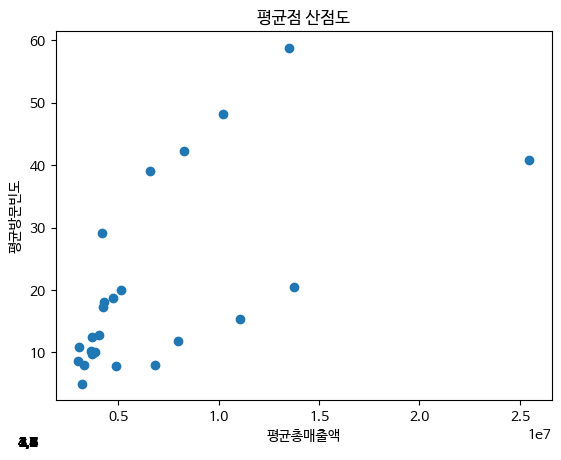

In [ ]:
x = np.hstack(평균총매출액.values[0:4]) #hstack : 수평으로 합치겠다. 리스트로 만듦
y = np.hstack(평균방문빈도.values[0:4])


labels = []
for i in range(1, 5):
  for j in range(1, 8):
    labels.append(str(i) + ',' + str(j)) #4*7 형태로 라벨을 만들어준다.

for label, x_count, y_count in zip(labels, x, y):
  plt.annotate(label, xycoords = 'data', xy=(x_count, y_count), xytext=(5, -5)) #라벨값과 x, y 값을 매핑

plt.plot(x, y, 'o')
plt.title('평균점 산점도')
plt.xlabel('평균총매출액')
plt.ylabel('평균방문빈도')

## 공분산분석

방문빈도를 통제한 상태에서 거주지역에 따른 총매출액 차이

In [ ]:
df1 = df[['총_매출액', '방문빈도', '거주지역']]
df1

,총_매출액,방문빈도,거주지역
0,4007080,17,6
1,3168400,14,4
2,2680780,18,6
3,5946600,17,5
4,13745950,73,6
...,...,...,...
995,5135090,8,6
996,10315690,49,6
997,2741290,10,4
998,11268990,15,5


In [ ]:
pg.ancova(dv = '총_매출액', between = '거주지역', covar = '방문빈도', data = df1)

,Source,SS,DF,F,p-unc,np2
0,거주지역,696696841275009.875,6,4.046,0.001,0.024
1,방문빈도,13701443685723036.000,1,477.393,0.000,0.325
2,Residual,28470960329516348.000,992,NaN,NaN,NaN


In [ ]:
pg.anova(dv = '총_매출액', between = '거주지역', data = df1)

,Source,ddof1,ddof2,F,p-unc,np2
0,거주지역,6,993,24.759,0.000,0.130


## 상관관계 분석
연속형 변수에 대해 서로 상관관계가 있는 지 판단

총매출액, 방문빈도, 카테고리 수 간의 선형적인 관계가 있는 지 확인

귀무 = 총매출액, 방문빈도, 카테고리 수 간의 선형적인 관계가 없다.

연구 = 총매출액, 방문빈도, 카테고리 수 간의 선형적인 관계가 있다.

In [ ]:
# 수치형 : 피어슨
# 범주형 : 스피어만

df1 = df[['총_매출액', '방문빈도', '구매_카테고리_수']]
df1

,총_매출액,방문빈도,구매_카테고리_수
0,4007080,17,6
1,3168400,14,4
2,2680780,18,6
3,5946600,17,5
4,13745950,73,6
...,...,...,...
995,5135090,8,6
996,10315690,49,6
997,2741290,10,4
998,11268990,15,5


In [ ]:
stats.pearsonr(df1['총_매출액'], df1['방문빈도'])
# 상관계수가 0에 가까울수록 상관관계가 낮고, 1에 가까울수록 상관관계가 높음

PearsonRResult(statistic=0.6311706453193392, pvalue=3.0519604496879027e-112)

In [ ]:
stats.pearsonr(df1['총_매출액'], df1['구매_카테고리_수'])

PearsonRResult(statistic=0.3083469132396713, pvalue=1.812142275681251e-23)

In [ ]:
stats.pearsonr(df1['방문빈도'], df1['구매_카테고리_수'])

PearsonRResult(statistic=0.3958607221846449, pvalue=7.345432750388509e-39)

In [ ]:
# 피어슨 상관계수 출력 : 표로 보여줌
df1.corr(method = 'pearson')

,총_매출액,방문빈도,구매_카테고리_수
총_매출액,1.000,0.631,0.308
방문빈도,0.631,1.000,0.396
구매_카테고리_수,0.308,0.396,1.000


## 편(부분) 상관관계 분석

영향을 주는 변수를 통제한 상태에서 상관계수를 구하는 방식

구매카테고리 수 통제한 상황에서 총매출액과 방문빈도 간에 상관관계가 있는 지 확인

귀무 = 구매 카테고리 수가 통제한 상황에서 총 매출액과 방문빈도 간에 유의미한 상관관계가 없다.

대립 = 구매 카테고리 수가 통제한 상황에서 총 매출액과 방문빈도 간에 유의미한 상관관계가 있다.

In [ ]:
pg.partial_corr(data = df1, x='총_매출액', y='방문빈도', covar='구매_카테고리_수') #디폴트로 method = pearson 으로 되어 있음

,n,r,CI95%,p-val
pearson,1000,0.583,"[0.54, 0.62]",0.000


## 순위형 변수 상관관계 분석

In [ ]:
df1 = df[['1회_평균매출액', '방문빈도']]
df1

,1회_평균매출액,방문빈도
0,235711,17
1,226314,14
2,148932,18
3,349800,17
4,188301,73
...,...,...
995,641886,8
996,210524,49
997,274129,10
998,751266,15


In [ ]:
stats.spearmanr(df1['1회_평균매출액'], df1['방문빈도'])

SignificanceResult(statistic=-0.4988411248473936, pvalue=4.929293870381245e-64)

In [ ]:
df1.corr(method = 'spearman')

,1회_평균매출액,방문빈도
1회_평균매출액,1.000,-0.499
방문빈도,-0.499,1.000


## 정준 상관분석

변수 그룹들이 각각의 특성이 있을 때, 이 그룹들이 서로 상관관계가 있는 지 확인

제품 만족도 (가격, 디자인, 품질)과 매장 만족도 (직원서비스, 매장시설, 고객관리) 사이에 상관관계가 있는 지

귀무 = 제품 만족도와 매장 만족도가 연관성이 없다

연구 = 제품 만족도와 매장 만족도와 유의한 상관관계를 가지고 있다.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CCA.csv', encoding = 'cp949')
df

,품질,가격,디자인,직원 서비스,매장 시설,고객관리
0,8,10,71,72,9,27
1,83,21,94,63,7,77
2,81,62,74,96,7,32
3,75,74,98,96,3,55
4,34,76,98,84,6,95
5,26,23,76,60,5,11
6,62,22,76,31,9,41
7,17,14,51,45,2,15
8,31,10,71,42,6,19
9,21,13,91,79,4,75


In [ ]:
U = df[['가격', '디자인', '품질']]
V = df[['직원 서비스', '매장 시설', '고객관리']]

In [ ]:
from sklearn.cross_decomposition import CCA #CCA : 정준상관분석의 약자

model = CCA(n_components=1).fit(U, V) #세 개의 변수를 하나의 변수(정준변수)로 만들어줌
U_, V_ = model.transform(U, V)
df_U = pd.DataFrame(U_)
df_V = pd.DataFrame(V_)
df_V

,0
0,-0.298
1,0.513
2,0.950
3,1.765
4,1.811
5,-0.746
6,-1.677
7,-1.006
8,-1.404
9,1.388


In [ ]:
stats.pearsonr(df_U[0], df_V[0])

PearsonRResult(statistic=0.7717687943183487, pvalue=0.0012226670192390164)

In [ ]:
# 정준변수들 내의 변수들 사이의 연관성 확인 (정준적재량...)
np.corrcoef(df_U[0].T, U.T)[0,1:4]


array([0.77461847, 0.55191153, 0.35045604])

In [ ]:
# 정준변수와 다른 정준변수 내의 변수들 간의 연관성 확인 (교차적재량)
np.corrcoef(df_U[0].T, V.T)[0,1:4]
# U의 정준변수와 V의 변수들

array([ 0.70598452, -0.0438384 ,  0.5889048 ])

In [ ]:
#정준적재
np.corrcoef(df_V[0].T, V.T)[0,1:4]

array([ 0.91476168, -0.0568025 ,  0.76305858])

In [ ]:
#교차적재 (V의 정준변수와 U의 변수들 간의 연관성 )
np.corrcoef(df_V[0].T, U.T)[0,1:4]

array([0.5978383 , 0.42592516, 0.27044132])

## 주성분 분석

여러 개의 변수들 중에 그 변수의 정보들을 가지고, 중요하다고 생각하는 성분들을 뽑는다.
영향이 높은 주성분을 가지고 분석을 함

단점 : 변수 자체가 중요한 경우, 다른 변수와 섞이는 경우 그 변수의 중요성이 낮아질 수 있다...

In [ ]:
from sklearn.decomposition import PCA
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ashopping2.csv", encoding = 'cp949')
df

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,...,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,...,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,...,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,...,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,...,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,...,5,4,4,4,4,4,5,5,4,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   고객ID              1000 non-null   int64  
 1   이탈여부              1000 non-null   int64  
 2   총_매출액             1000 non-null   int64  
 3   방문빈도              1000 non-null   int64  
 4   1회_평균매출액          1000 non-null   int64  
 5   할인권_사용 횟수         1000 non-null   int64  
 6   총_할인_금액           1000 non-null   int64  
 7   고객등급              1000 non-null   int64  
 8   구매유형              1000 non-null   int64  
 9   클레임접수여부           1000 non-null   int64  
 10  구매_카테고리_수         1000 non-null   int64  
 11  거주지역              1000 non-null   int64  
 12  성별                1000 non-null   int64  
 13  고객_나이대            1000 non-null   int64  
 14  거래기간              1000 non-null   int64  
 15  할인민감여부            1000 non-null   int64  
 16  멤버쉽_프로그램_가입전_만족도  1000 non-null   int64  
 

In [ ]:
df = df.dropna(axis = 0) #결측값이 있는 행을 지우겠다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841 entries, 0 to 999
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   고객ID              841 non-null    int64  
 1   이탈여부              841 non-null    int64  
 2   총_매출액             841 non-null    int64  
 3   방문빈도              841 non-null    int64  
 4   1회_평균매출액          841 non-null    int64  
 5   할인권_사용 횟수         841 non-null    int64  
 6   총_할인_금액           841 non-null    int64  
 7   고객등급              841 non-null    int64  
 8   구매유형              841 non-null    int64  
 9   클레임접수여부           841 non-null    int64  
 10  구매_카테고리_수         841 non-null    int64  
 11  거주지역              841 non-null    int64  
 12  성별                841 non-null    int64  
 13  고객_나이대            841 non-null    int64  
 14  거래기간              841 non-null    int64  
 15  할인민감여부            841 non-null    int64  
 16  멤버쉽_프로그램_가입전_만족도  841 non-null    int64  
 1

In [ ]:
# 표준화 (동일한 영향도를 주기 위해)

from sklearn.preprocessing import StandardScaler



x = df.drop(['총_매출액'], axis = 1).values #종속변수로 쓸 총_매출액 열의 값만 제거해줌
y = df['총_매출액'].values
x = StandardScaler().fit_transform(x)

#standardscaler 을 하면 변수명들이 모두 제거됨. 따라서 먼저 변수명들을 저장해줌.
feature = df.drop(['총_매출액'], axis = 1).columns #x의 칼럼명들을 feature로 저장
x = pd.DataFrame(x, columns = feature) # scaler를 적용한 x에 새로 column 명들을 넣어서 dataframe 형태로 저장


In [ ]:
x

,고객ID,이탈여부,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,-1.732,-0.267,-0.442,-0.350,-1.803,-2.584,-0.606,0.906,-0.908,0.728,...,0.305,1.360,0.388,0.248,0.369,0.709,0.576,0.366,0.635,0.674
1,-1.722,-0.267,-0.442,0.138,-1.803,-2.587,-0.606,0.906,1.101,-0.111,...,0.305,0.189,-0.977,0.248,0.369,0.709,0.576,0.366,-0.622,0.674
2,-1.718,-0.267,2.241,-0.553,-0.847,-0.420,-0.606,-1.107,-0.908,0.728,...,-0.922,0.189,0.388,0.248,-0.872,-0.373,0.576,0.366,-0.622,0.674
3,-1.715,-0.267,-0.010,-0.811,0.467,0.494,-0.606,0.906,-0.908,-0.111,...,0.305,0.189,0.388,0.248,-0.872,-0.373,-0.433,0.366,0.635,-0.675
4,-1.711,-0.267,-0.969,0.331,1.661,0.789,-0.606,-2.114,-0.908,0.728,...,-2.148,-0.981,0.388,-2.312,0.369,-0.373,-1.442,-0.865,-0.622,-2.024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,1.697,-0.267,-0.298,1.291,0.825,0.784,-0.606,-0.101,-0.908,1.568,...,1.531,1.360,0.388,-1.032,0.369,1.791,0.576,0.366,0.635,0.674
837,1.701,-0.267,-0.873,1.387,-1.564,-2.234,-0.606,-0.101,1.101,0.728,...,0.305,0.189,1.753,0.248,1.610,0.709,0.576,0.366,0.635,0.674
838,1.704,-0.267,1.091,-0.458,-1.205,-0.957,-0.606,-1.107,-0.908,0.728,...,0.305,1.360,0.388,-1.032,0.369,-0.373,1.585,0.366,0.635,0.674
839,1.711,-0.267,-0.537,1.855,0.467,0.490,-0.606,-0.101,-0.908,-0.111,...,-0.922,-2.151,-2.343,-2.312,-2.114,-1.455,-0.433,-0.865,-1.879,-2.024


In [ ]:
pca = PCA(random_state = 1)
X_p = pca.fit_transform(x)

pca.explained_variance_ratio_

array([1.62329479e-01, 1.21565834e-01, 6.97507700e-02, 5.80648925e-02,
       5.02134681e-02, 4.36169233e-02, 3.93011483e-02, 3.74986746e-02,
       3.45930523e-02, 2.89140784e-02, 2.72079134e-02, 2.55501099e-02,
       2.48824275e-02, 2.40964959e-02, 2.10394038e-02, 2.00326014e-02,
       1.93279651e-02, 1.75138298e-02, 1.69093454e-02, 1.51443333e-02,
       1.50109128e-02, 1.40443331e-02, 1.29810274e-02, 1.23310963e-02,
       1.19445483e-02, 1.19276122e-02, 1.05273564e-02, 8.98721390e-03,
       8.48108721e-03, 7.31732190e-03, 6.56667875e-03, 5.46665569e-03,
       5.34224026e-03, 3.82218737e-03, 3.54572120e-03, 2.40112472e-03,
       1.75013653e-03, 3.20138449e-32])

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.16232948, 0.28389531, 0.35364608, 0.41171098, 0.46192444,
       0.50554137, 0.54484252, 0.58234119, 0.61693424, 0.64584832,
       0.67305623, 0.69860634, 0.72348877, 0.74758527, 0.76862467,
       0.78865727, 0.80798524, 0.82549907, 0.84240841, 0.85755275,
       0.87256366, 0.88660799, 0.89958902, 0.91192012, 0.92386466,
       0.93579228, 0.94631963, 0.95530685, 0.96378793, 0.97110526,
       0.97767193, 0.98313859, 0.98848083, 0.99230302, 0.99584874,
       0.99824986, 1.        , 1.        ])

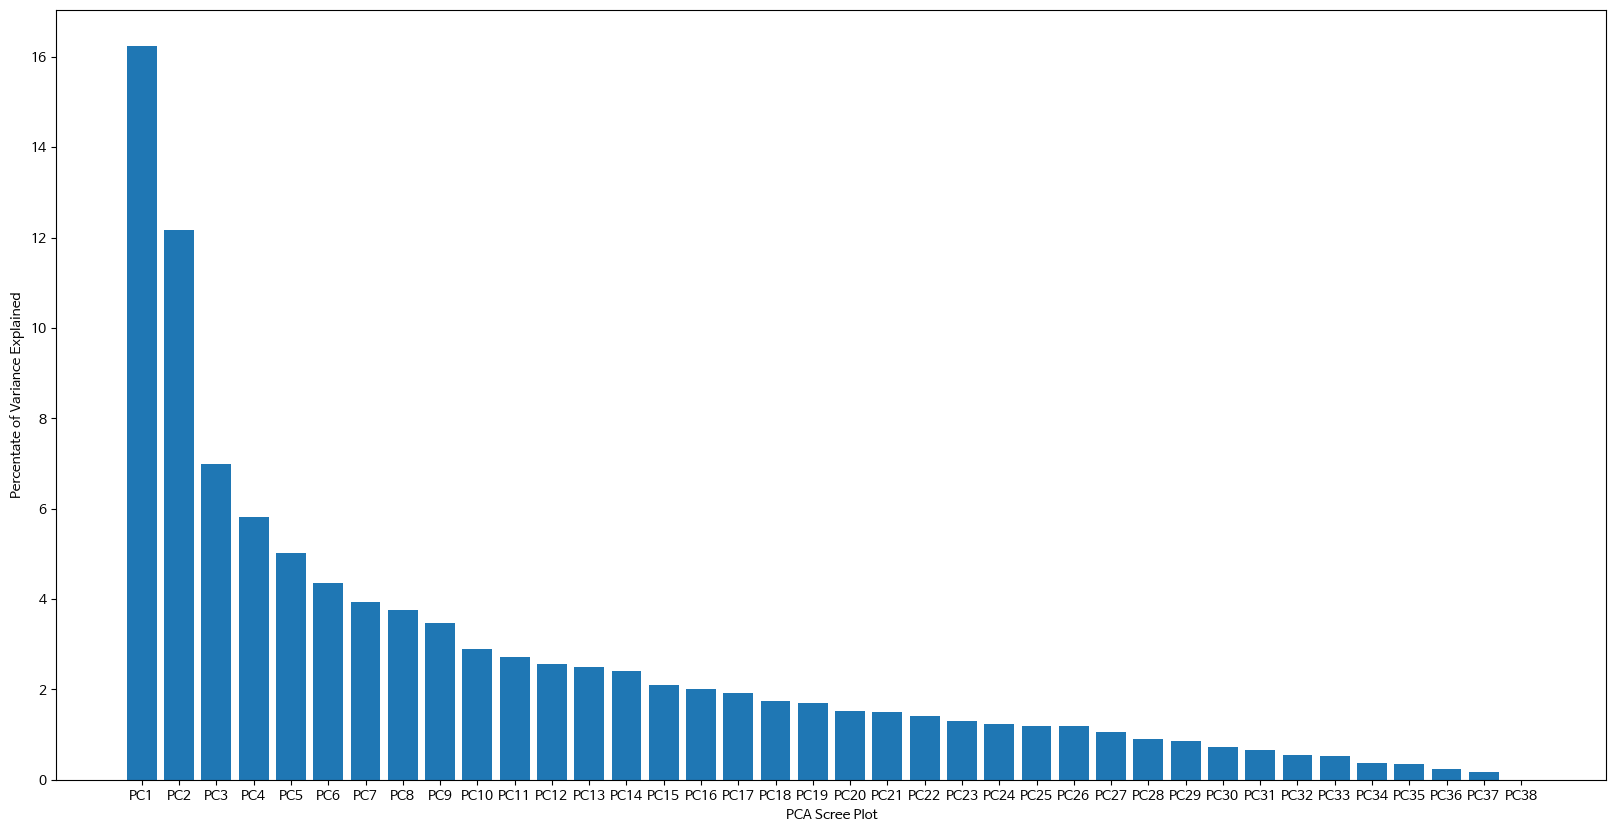

In [ ]:
import matplotlib.pyplot as plt

percent_variance = np.round(pca.explained_variance_ratio_ *100, decimals = 2)
columns = []
for i in range(len(percent_variance)):
  columns.append(f'PC{i+1}')
fig = plt.figure(figsize = (20,10))
#fig.set_size_inches(20,10)
ax = plt.bar(x = range(len(percent_variance)), height = percent_variance, tick_label = columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('PCA Scree Plot')
plt.show()

In [ ]:
pca = PCA(n_components = 9) #주성분을 몇 개로 할지 결정
PC = pca.fit_transform(x)
pc_df = pd.DataFrame(data = PC, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9'])
pc_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,-3.144,0.147,-0.611,1.133,3.286,-0.580,0.217,0.064,0.249
1,-0.411,-0.926,-0.973,-1.127,2.896,-0.277,-1.317,-0.219,-1.345
2,-0.381,3.514,0.459,-0.080,0.646,1.627,-1.447,-0.550,2.003
3,-2.241,1.240,-0.600,2.685,-0.352,0.234,1.941,-1.032,-0.060
4,4.258,-0.431,0.018,-1.877,-1.474,-1.189,1.344,0.921,0.964
...,...,...,...,...,...,...,...,...,...
836,-2.987,1.319,0.483,-1.020,-0.575,-0.535,0.450,2.011,0.520
837,-1.650,-2.180,-1.144,-1.469,2.517,-0.410,-0.529,3.737,-0.491
838,-2.389,1.843,0.337,-1.289,1.390,1.192,-0.488,-0.987,1.645
839,5.868,1.085,0.039,-0.346,-0.131,-0.250,-0.510,2.195,0.917


In [ ]:
pca.explained_variance_ratio_

array([0.16232948, 0.12156583, 0.06975048, 0.05806479, 0.05021278,
       0.04361419, 0.03929644, 0.03749012, 0.03458806])

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.16232948, 0.28389531, 0.35364579, 0.41171057, 0.46192336,
       0.50553755, 0.54483399, 0.58232411, 0.61691217])

## 요인 분석

그룹을 지어서 공통적인 요인을 뽑아내는 것

주성분과 비슷하지만 차이점 : 어떤 새로운 요인을 뽑아냄 (기존의 정보가 온전하게 뽑아지진 않음)

In [ ]:
!pip install factor-analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 861.8 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 28.4 MB/s eta 0:00:00
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42486 sha256=3454696dfe240e00dbe7a2b99e90a9db414202f132d519c3b84d5f9f7653aebf
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor-analyzer


In [ ]:
# 요인분석
from factor_analyzer import FactorAnalyzer
items = x.columns.tolist()
items.sort()

fa = FactorAnalyzer(n_factors = 8, method = 'ml', rotation = 'promax')
fa.fit(x[items])

/usr/local/lib/python3.10/dist-packages/factor_analyzer/factor_analyzer.py:443: RuntimeWarning: invalid value encountered in log
  error = -(np.sum(np.log(values) - values) - n_factors + corr_mtx.shape[0])
/usr/local/lib/python3.10/dist-packages/factor_analyzer/factor_analyzer.py:574: UserWarning: Failed to converge: ABNORMAL_TERMINATION_IN_LNSRCH
  warnings.warn(f"Failed to converge: {res.message}")


FactorAnalyzer(method='ml', n_factors=8, rotation_kwargs={})

In [ ]:
# 요인분석 결과 확인
result = pd.DataFrame(fa.loadings_,index = items)
result

,0,1,2,3,4,5,6,7
1회_평균매출액,-0.026,-0.043,0.049,-0.141,0.045,0.034,-0.058,0.773
Frequency,-0.088,-0.007,0.080,0.870,0.008,0.041,-0.025,-0.171
Monetary,-0.056,0.030,0.211,0.650,0.051,0.084,-0.113,0.594
Recency,0.027,1.009,0.137,-0.088,0.056,0.006,-0.043,0.044
가격_적절성,0.696,0.021,-0.007,-0.021,-0.131,0.039,0.004,-0.003
거래기간,0.036,0.955,0.162,0.028,0.039,0.013,-0.034,0.029
거주지역,0.011,0.136,0.970,0.153,0.002,0.040,0.028,0.041
고객ID,-0.016,-0.043,0.071,-0.063,-0.023,-0.002,0.011,0.013
고객_나이대,-0.053,0.029,-0.000,0.046,-0.045,-0.097,0.059,0.009
고객등급,0.001,-0.126,-0.800,-0.050,-0.041,0.008,-0.058,0.019


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


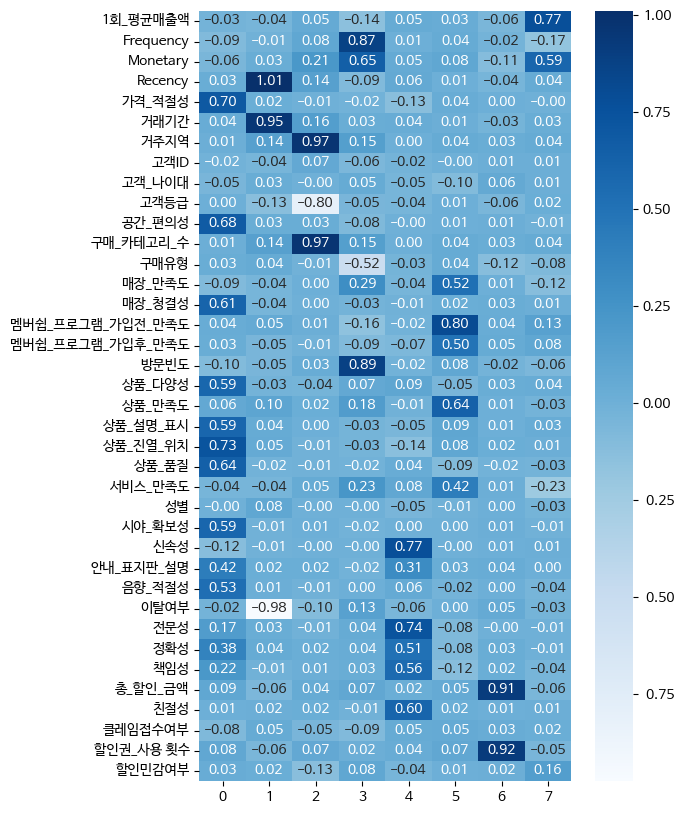

In [ ]:
import seaborn as sns
plt.figure(figsize =(6,10))
sns.heatmap(result, cmap = 'Blues', annot = True, fmt = '.2f') #값에 따라 값이 크면 색이 진해지고...그런 그래프

In [117]:
fa_0 = result[(result[0]<= -0.4) | (result[0]>= 0.4)][0].index
fa_0

Index(['가격_적절성', '공간_편의성', '매장_청결성', '상품_다양성', '상품_설명_표시', '상품_진열_위치', '상품_품질',
       '시야_확보성', '안내_표지판_설명', '음향_적절성'],
      dtype='object')

In [119]:
fa_1 = result[(result[1]<= -0.4) | (result[1]>= 0.4)][1].index
fa_1

Index(['Recency', '거래기간', '이탈여부'], dtype='object')